In [6]:
import pandas as pd
import cv2 as cv
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [30]:
import sys
from glob import glob
from os.path import join
from pathlib import Path
sys.path.append('/work/megapixels_dev/megapixels')
from app.models.bbox import BBox
from app.utils import im_utils

In [15]:
dir_ims = '/data_store/datasets/people/uccs/rois/extracted_p100_sr_z2/'

In [16]:
fp_ims = glob(join(dir_ims, '*.jpg'))
print(len(fp_ims))

13407


In [17]:
from random import randint

In [18]:
def eq_hist(im):
  for c in range(0,2):
    im[:,:,c] = cv.equalizeHist(im[:,:,c])
  return im

def eq_hist_yuv(im):
  im_yuv = cv.cvtColor(im, cv.COLOR_BGR2YUV)
  im_yuv[:,:,0] = cv.equalizeHist(im_yuv[:,:,0])
  return cv.cvtColor(im_yuv, cv.COLOR_YUV2BGR)

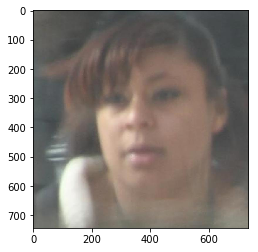

In [19]:
rn = randint(0,len(fp_ims)-1)
fp_im = fp_ims[rn]
im = cv.imread(fp_im)
plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))

(744, 736, 3)


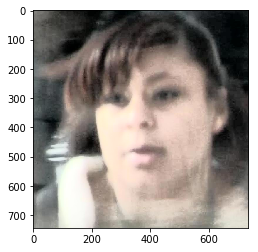

In [20]:
im_eq = eq_hist_yuv(im)
print(im_eq.shape)
plt.imshow(cv.cvtColor(im_eq, cv.COLOR_BGR2RGB))

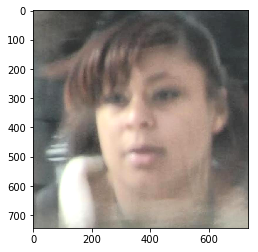

In [44]:
im_merge = cv.addWeighted(im_eq, 0.35, im, 0.75, 0)
plt.imshow(cv.cvtColor(im_merge, cv.COLOR_BGR2RGB))

In [22]:
from PIL import Image, ImageOps, ImageFilter

In [35]:
help(im_utils.ensure_pil)

Help on function ensure_pil in module app.utils.im_utils:

ensure_pil(im, bgr2rgb=False)
    Ensure image is Pillow format
    :param im: image in numpy or PIL.Image format
    :returns: image in Pillow RGB format



In [53]:
im_pil = im_utils.ensure_pil(im_merge, bgr2rgb=True)

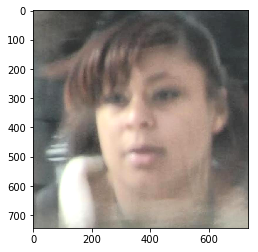

In [54]:
plt.imshow(im_pil)

In [55]:
im_pil = im_pil.filter(ImageFilter.UnsharpMask)

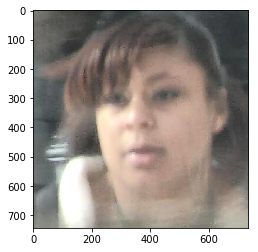

In [56]:
plt.imshow(im_pil)

In [1]:
import face_recognition

In [2]:
help(face_recognition.face_encodings)

Help on function face_encodings in module face_recognition.api:

face_encodings(face_image, known_face_locations=None, num_jitters=1)
    Given an image, return the 128-dimension face encoding for each face in the image.
    
    :param face_image: The image that contains one or more faces
    :param known_face_locations: Optional - the bounding boxes of each face if you already know them.
    :param num_jitters: How many times to re-sample the face when calculating encoding. Higher is more accurate, but slower (i.e. 100 is 100x slower)
    :return: A list of 128-dimensional face encodings (one for each face in the image)

